In [1]:
pip install panda openpyxl

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 24.3 MB/s eta 0:00:00
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7238 sha256=7cdf09954e1f4b61efe05b48655e04a4bc55f3f02a6be2632fdb0c33820d5e6c
  Stored in directory: /home/onyxia/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Chemin du fichier Excel à lire
chemin_fichier_excel = 'traitement/nutriments/total.xlsx'

# Charger le fichier Excel dans un DataFrame pandas en spécifiant à partir de quelle ligne commencer
df = pd.read_excel(chemin_fichier_excel, engine='openpyxl')

# Chemin où vous souhaitez sauvegarder le fichier CSV
chemin_fichier_csv = 'traitement/nutriments/total.csv'

# Sauvegarder le DataFrame au format CSV
df.to_csv(chemin_fichier_csv, index=False)

print(f'Le fichier Excel a été converti en CSV avec succès. Chemin du fichier CSV : {chemin_fichier_csv}')


Le fichier Excel a été converti en CSV avec succès. Chemin du fichier CSV : traitement/nutriments/total.csv


In [ ]:
from selection_cocktail import noms_cocktails_au_hasard

In [56]:
noms_cocktails_au_hasard = ['Margarita Melon Jalapeno', 'Rhum Chic Choc aux fruits rouges', 'Le Mama Rula', 'Digestif Hivernal Tequila et Tia Maria']

In [57]:
import pandas as pd

def nutriments_pour_cocktails(liste_cocktails):
    # Charger le fichier CSV
    chemin_csv = 'traitement/nutriments/total.csv'
    df_nutriments = pd.read_csv(chemin_csv)

    # Filtrer les lignes pour les cocktails spécifiés
    cocktails_filtrés = df_nutriments[df_nutriments['post_title'].isin(liste_cocktails)]

    return cocktails_filtrés

# Exemple d'utilisation avec noms_cocktails_au_hasard
noms_cocktails = noms_cocktails_au_hasard
resultat = nutriments_pour_cocktails(noms_cocktails)

# Afficher le résultat
print(resultat)


         objectID                              post_title  \
257  cocktail_834                Margarita Melon Jalapeno   
288  cocktail_645                            Le Mama Rula   
359  cocktail_443  Digestif Hivernal Tequila et Tia Maria   
364   cocktail_77        Rhum Chic Choc aux fruits rouges   

                                                   url  quantity_kcal_total  \
257  https://1ou2cocktails.com/cocktails/margarita-...               258.25   
288  https://1ou2cocktails.com/cocktails/le-mama-rula/               164.75   
359  https://1ou2cocktails.com/cocktails/digestif-h...               102.89   
364  https://1ou2cocktails.com/cocktails/rhum-chic-...               348.92   

     quantity_proteine_total  quantity_eau_total  quantity_calcium_total  \
257                     0.15               69.77                    2.57   
288                     0.88               61.73                   26.55   
359                     1.92               82.15                   66.

In [58]:
import pandas as pd

def lire_fichier_total_csv():
    # Chemin du fichier CSV
    chemin_csv = 'fichier_final_profil.csv'
    
    # Lire le fichier CSV
    df_nutriments = pd.read_csv(chemin_csv)
    
    return df_nutriments

# Exemple d'utilisation
dataframe_total = lire_fichier_total_csv()

# Afficher le DataFrame
print(dataframe_total)


     Nutrient  Valeur_finale
0      Energy       2316.651
1     Protein         46.200
2       Water       2300.000
3   Magnesium        300.000
4   Manganese          3.000
5   Potassium       3500.000
6  Vitamin B6          1.500
7   Vitamin C            NaN
8   Vitamin D         15.000
9   Vitamin E         11.000


In [59]:
import pandas as pd

def convertir_valeurs_en_nombres(df):
    # Convertir la colonne 'Valeur_finale' en nombres avec 'coerce' pour remplacer les valeurs non numériques par NaN
    df['Valeur_finale'] = pd.to_numeric(df['Valeur_finale'], errors='coerce')
    
    # Remplacer les NaN par la valeur souhaitée, par exemple 0
    df['Valeur_finale'].fillna(0, inplace=True)
    
    return df

# Utiliser la fonction sur votre DataFrame
df_resultat_ajuste = convertir_valeurs_en_nombres(dataframe_total)

# Afficher le DataFrame résultant
print(df_resultat_ajuste)


     Nutrient  Valeur_finale
0      Energy       2316.651
1     Protein         46.200
2       Water       2300.000
3   Magnesium        300.000
4   Manganese          3.000
5   Potassium       3500.000
6  Vitamin B6          1.500
7   Vitamin C          0.000
8   Vitamin D         15.000
9   Vitamin E         11.000


In [60]:
import pandas as pd

def convertir_valeurs_en_nombres(df):
    # Exclure les colonnes spécifiques de la conversion
    colonnes_a_exclure = ['objectID', 'post_title', 'url']
    colonnes_a_convertir = [colonne for colonne in df.columns if colonne not in colonnes_a_exclure]

    # Convertir les colonnes sélectionnées en nombres avec 'coerce' pour remplacer les valeurs non numériques par NaN
    df[colonnes_a_convertir] = df[colonnes_a_convertir].apply(pd.to_numeric, errors='coerce')
    
    # Remplacer les NaN par la valeur souhaitée, par exemple 0
    df.fillna(0, inplace=True)
    
    return df

# Utiliser la fonction sur votre DataFrame
df_resultat_ajuste2 = convertir_valeurs_en_nombres(resultat)

# Afficher le DataFrame résultant
print(df_resultat_ajuste2)


         objectID                              post_title  \
257  cocktail_834                Margarita Melon Jalapeno   
288  cocktail_645                            Le Mama Rula   
359  cocktail_443  Digestif Hivernal Tequila et Tia Maria   
364   cocktail_77        Rhum Chic Choc aux fruits rouges   

                                                   url  quantity_kcal_total  \
257  https://1ou2cocktails.com/cocktails/margarita-...               258.25   
288  https://1ou2cocktails.com/cocktails/le-mama-rula/               164.75   
359  https://1ou2cocktails.com/cocktails/digestif-h...               102.89   
364  https://1ou2cocktails.com/cocktails/rhum-chic-...               348.92   

     quantity_proteine_total  quantity_eau_total  quantity_calcium_total  \
257                     0.15               69.77                    2.57   
288                     0.88               61.73                   26.55   
359                     1.92               82.15                   66.

In [61]:
import pandas as pd

# Données du DataFrame initial
data_initial = df_resultat_ajuste2

df_initial = pd.DataFrame(data_initial)

# Supprimer les colonnes objectID, url et quantity_magnésium_total
df_initial = df_initial.drop(columns=['objectID', 'url', 'quantity_calcium_total'])

# Renommer les colonnes selon le nutriment en anglais
nutriments_mapping = {
    'quantity_kcal_total': 'Energy',
    'quantity_proteine_total': 'Protein',
    'quantity_eau_total': 'Water',
    'quantity_calcium_total': 'Calcium',
    'quantity_manganèse_total': 'Manganese',
    'quantity_potassium_total': 'Potassium',
    'quantity_sodium_total': 'Sodium',
    'quantity_vitamine B6_total': 'Vitamin B6',
    'quantity_vitamine C_total': 'Vitamin C',
    'quantity_vitamine D_total': 'Vitamin D',
    'quantity_vitamine E_total': 'Vitamin E',
    'quantity_magnésium_total' : 'Magnesium'
}

df_initial = df_initial.rename(columns=nutriments_mapping)

# Afficher le DataFrame résultant
print(df_initial)


                                 post_title  Energy  Protein   Water  \
257                Margarita Melon Jalapeno  258.25     0.15   69.77   
288                            Le Mama Rula  164.75     0.88   61.73   
359  Digestif Hivernal Tequila et Tia Maria  102.89     1.92   82.15   
364        Rhum Chic Choc aux fruits rouges  348.92     0.48  137.78   

     Magnesium  Manganese  Potassium  Sodium  Vitamin B6  Vitamin C  \
257       4.71       0.35      46.50    4.66        0.03       3.97   
288       5.19       0.27      59.74   16.21        0.03       3.02   
359       7.99       0.01     115.38   21.69        0.12       0.74   
364      10.74       0.65     125.44    5.16        0.06      30.61   

     Vitamin D  Vitamin E  
257       0.00       0.01  
288       0.02       0.02  
359       0.15       0.06  
364       0.00       0.20  


In [73]:
import pandas as pd

# Votre DataFrame initial
data_initial = df_resultat_ajuste

df_initial = pd.DataFrame(data_initial)

# Inverser le DataFrame
df_inverse = df_initial.transpose()

# Remplacer la première ligne avec les noms de colonnes
df_inverse.columns = df_inverse.iloc[0]

# Supprimer la première ligne
df_inverse = df_inverse[1:]

# Réinitialiser l'index
df_inverse = df_inverse.reset_index(drop=True)

# Afficher le DataFrame résultant
print(df_inverse)


Nutrient    Energy Protein   Water Magnesium Manganese Potassium Vitamin B6  \
0         2316.651    46.2  2300.0     300.0       3.0    3500.0        1.5   

Nutrient Vitamin C Vitamin D Vitamin E  
0              0.0      15.0      11.0  


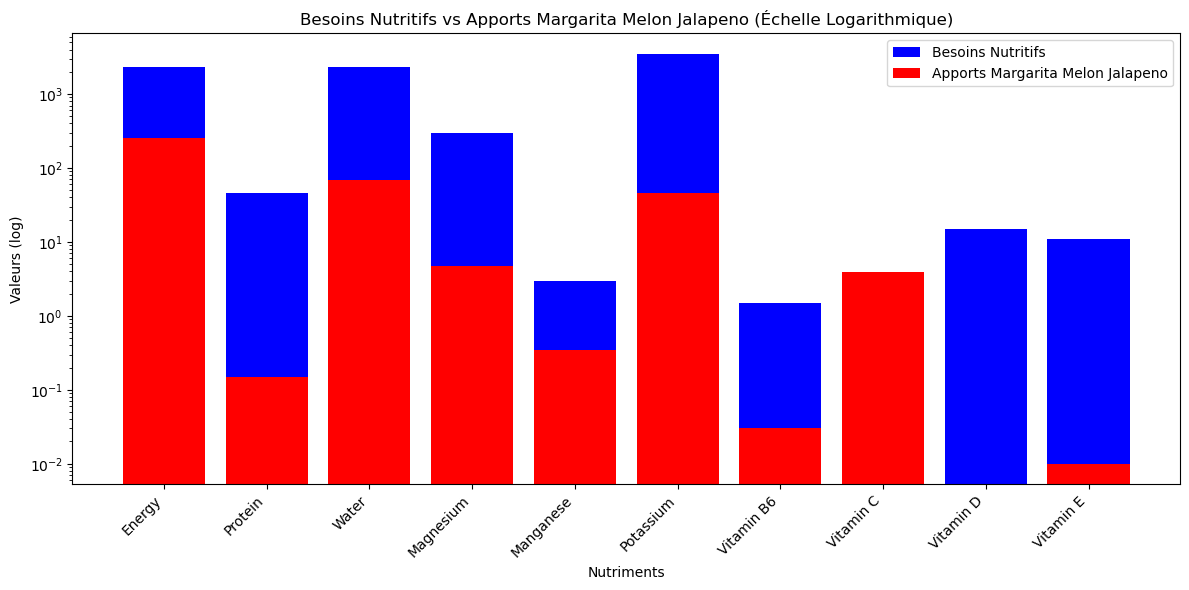

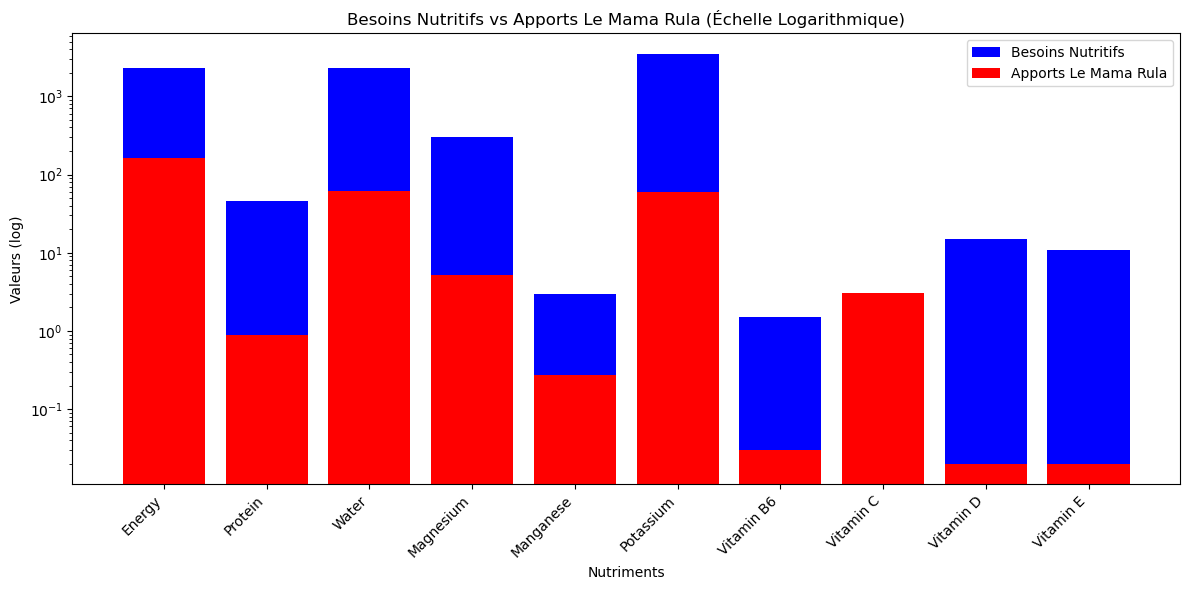

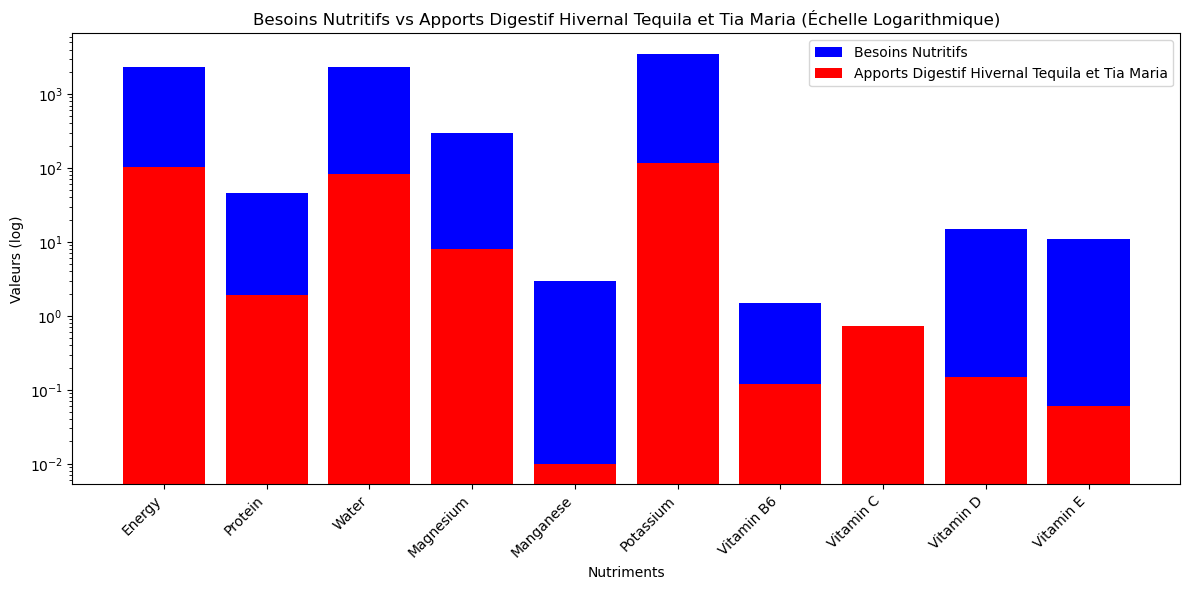

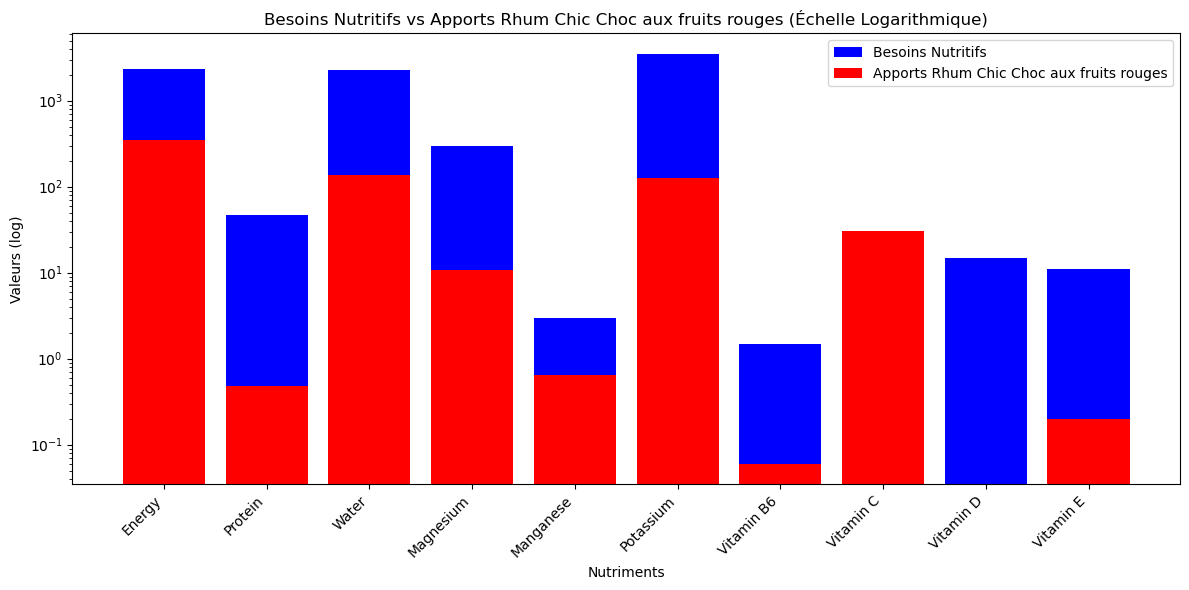

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Votre DataFrame initial avec les besoins nutritifs
df_inverse = pd.DataFrame(df_inverse)

# Votre DataFrame pour les apports de différents cocktails
df_initial = pd.DataFrame(df_initial)

# Créer un graphique pour chaque cocktail
for index, row in df_initial.iterrows():
    cocktail_name = row['post_title']
    
    # Créer un graphique à barres avec échelle logarithmique sur l'axe y
    plt.figure(figsize=(12, 6))
    
    # Besoins nutritifs existants (bleu)
    plt.bar(df_inverse['Nutrient'], df_inverse['Value'], color='blue', label='Besoins Nutritifs')
    
    # Apports du cocktail (rouge)
    plt.bar(df_inverse['Nutrient'], row[df_inverse['Nutrient']], color='red', label=f'Apports {cocktail_name}')
    
    plt.yscale('log')  # Ajouter une échelle logarithmique sur l'axe y
    
    plt.title(f'Besoins Nutritifs vs Apports {cocktail_name} (Échelle Logarithmique)')
    plt.xlabel('Nutriments')
    plt.ylabel('Valeurs (log)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    # Enregistrer le graphique au format PNG
    plt.tight_layout()
    plt.savefig(f'graphique_{cocktail_name}.png')
    
    # Afficher le graphique
    plt.show()
